#**First Example: MNIST Again**

Recall, the very first example we worked on was predicting digits from handwriting, using the MNIST dataset. Let's refresh on how that simple model performed. It was pretty impressive; it exceeds 98% accuracy. But, would you be comfortable deploying this at the USPS? 

What does a 2% error mean on this problem? It's worse than it appears. Think about the number of digits in a single address. There is a zip code, with 5 digits in it. If I make a mistake on any of the 5 digits, a sorting error will result. That means an error of 2% on a single prediction translates to a 10% error rate at the zipcode level (2+2+2+2+2). Even worse, addresses have house numbers in them (say there are 3 digits in the average house number, that means another 2+2+2, so our error rate is actually more like 16% at the address level. That's actually really bad! 

In [4]:
from tensorflow.keras.datasets import mnist
from tensorflow import keras 
from tensorflow.keras import layers

# Load the data.
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Pre-process the data, to flatten the images into vectors and scale the values.
train_images = train_images.reshape((len(train_images), 28*28))
train_images = train_images.astype("float32") / 255 
test_images = test_images.reshape((len(test_images), 28*28))
test_images = test_images.astype("float32") / 255 

# And reshape these to make sure the second dimension is formally defined as 1 (else you'll get a shape error in the model.fit() call)
train_labels = train_labels.reshape(len(train_labels),1)
test_labels = test_labels.reshape(len(test_labels),1)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

history = model.fit(train_images, keras.utils.to_categorical(train_labels), epochs=5, batch_size=128, validation_split=0.2)

ValueError: ignored

So, we really need extremely high accuracy for this use case. Let's try a simple convnet, and see how it performs in comparison. It'll have a lot more parameters and take longer to train, of course, but the effort will be worth it. This model can get up to 99.5% error. Using similar logic to the above, this translates to an error rate of about 0.5*8 = 4% at the address level. Still not great, but it's much better.

# **Now Let's Try a ConvNet**

11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28, 1)


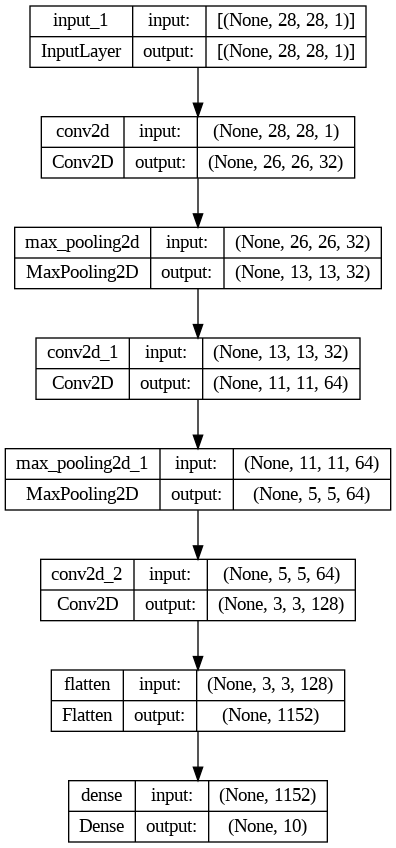

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow import keras 
from tensorflow.keras import layers

# Load the data.
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Pre-process the data - notice we are not flattening the images into vectors anymore! We are keeping them in a higher-rank tensor format. 
# This is important, because the Conv2D layer is designed specifically for image data! It's going to scan over subsets of the image to identify features.
# The format here translates to: (observations_count, image_width, image_height, num_color_channels).
train_images = train_images.reshape((len(train_images), 28, 28, 1))
train_images = train_images.astype("float32") / 255 
test_images = test_images.reshape((len(test_images), 28, 28, 1))
test_images = test_images.astype("float32") / 255 
train_labels = train_labels.reshape(len(train_labels),1)
test_labels = test_labels.reshape(len(test_labels),1)

print(train_images.shape)

# Define the Convnet
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)

# We then flatten this output from a 'square' output to a vector so it can enter the output layer...
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

# Compile the network model.
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

keras.utils.plot_model(model, show_shapes=True)
#model.summary()


In [3]:
# Fit the model. 
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 13s 4ms/step - loss: 0.1865 - accuracy: 0.9428 - val_loss: 0.0684 - val_accuracy: 0.9803
Epoch 2/5
750/750 [==============================] - 3s 3ms/step - loss: 0.0518 - accuracy: 0.9841 - val_loss: 0.0509 - val_accuracy: 0.9854
Epoch 3/5
750/750 [==============================] - 2s 3ms/step - loss: 0.0352 - accuracy: 0.9895 - val_loss: 0.0478 - val_accuracy: 0.9866
Epoch 4/5
750/750 [==============================] - 2s 3ms/step - loss: 0.0262 - accuracy: 0.9918 - val_loss: 0.0417 - val_accuracy: 0.9888
Epoch 5/5
750/750 [==============================] - 2s 3ms/step - loss: 0.0208 - accuracy: 0.9933 - val_loss: 0.0374 - val_accuracy: 0.9905
